# Домашнее задание №1. SQL

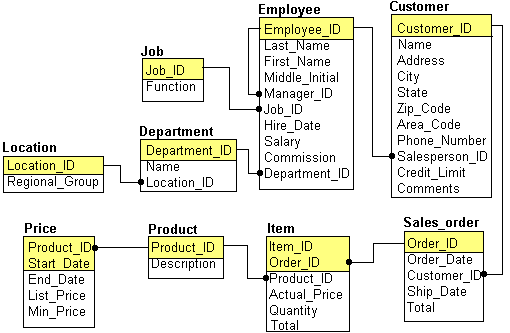



**Первые 20 заданий необходимо выполнять без использования соединений таблиц, в оставшихся 20 соединения таблиц и подзапросы допускаются**

In [1]:
!pip install psycopg2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import psycopg2
import pandas as pd

DB_HOST = 'de-edu-db.chronosavant.ru'
DB_USER = 'da11'
DB_USER_PASSWORD = 'gandalfthegrey'
DB_NAME = 'edu'

conn = psycopg2.connect(host=DB_HOST, user=DB_USER, password=DB_USER_PASSWORD, dbname=DB_NAME)

**Пример запроса (не забывайте указывать da. перед названием таблицы):**

In [3]:
pd.read_sql_query("select * from da.customer", conn)

,customer_id,name,address,city,state,zip_code,area_code,phone_number,salesperson_id,credit_limit,comments
0,100,JOCKSPORTS,345 VIEWRIDGE,BELMONT,CA,96711,415,5986609,7844,5000.0,Very friendly people to work with -- sales rep...
1,101,TKB SPORT SHOP,490 BOLI RD.,REDWOOD CITY,CA,94061,415,3681223,7521,10000.0,Rep called 5/8 about change in order - contact...
2,102,VOLLYRITE,9722 HAMILTON,BURLINGAME,CA,95133,415,6443341,7654,7000.0,Company doing heavy promotion beginning 10/89....
3,103,JUST TENNIS,HILLVIEW MALL,BURLINGAME,CA,97544,415,6779312,7521,3000.0,Contact rep about new line of tennis rackets.
4,104,EVERY MOUNTAIN,574 SURRY RD.,CUPERTINO,CA,93301,408,9962323,7499,10000.0,Customer with high market share (23%) due to a...
5,105,K + T SPORTS,3476 EL PASEO,SANTA CLARA,CA,91003,408,3769966,7844,5000.0,Tends to order large amounts of merchandise at...
6,106,SHAPE UP,908 SEQUOIA,PALO ALTO,CA,94301,415,3649777,7521,6000.0,Support intensive. Orders small amounts (< 800...
7,107,WOMENS SPORTS,VALCO VILLAGE,SUNNYVALE,CA,93301,408,9674398,7499,10000.0,First sporting goods store geared exclusively ...
8,108,NORTH WOODS HEALTH AND FITNESS SUPPLY CENTER,98 LONE PINE WAY,HIBBING,MN,55649,612,5669123,7844,8000.0,
9,201,STADIUM SPORTS,47 IRVING PL.,NEW YORK,NY,10003,212,5555335,7557,10000.0,Large general-purpose sports store with an aff...


### Задание 1
Выбрать коды всех городов, в которых расположены отделы фирмы.

In [7]:
pd.read_sql_query("""
Select distinct area_code
from da.customer
""", conn)

,area_code
0,617
1,516
2,817
3,713
4,415
5,508
6,512
7,914
8,212
9,612


### Задание 2
Для каждого сотрудника определить, какой процент по отношению к зарплате составляют его комиссионные.

In [13]:
pd.read_sql_query("""
Select  case
  when commission>0 then round((commission	/ salary)*100, 1)
  else 0
  end percent
  from da.employee
""", conn)

,percent
0,0.0
1,18.8
2,0.0
3,0.0
4,0.0
5,40.0
6,24.0
7,96.0
8,0.0
9,24.0


### Задание 3
Вывести два инициала (с точками) и фамилии всех сотрудников

In [16]:
pd.read_sql_query("""
Select substr(first_name,1,1)||'.'||middle_initial ||'. '|| last_name
from da.employee
""", conn)

,?column?
0,J.Q. SMITH
1,K.J. ALLEN
2,J.K. DOYLE
3,L.S. DENNIS
4,L.D. BAKER
5,C.D. WARD
6,D.T. PETERS
7,K.P. SHAW
8,S.S. DUNCAN
9,G.J. LANGE


### Задание 4
По каждой сделке вывести точную сумму сделки, сумму сделки, округленную в большую сторону, округленную в меньшую сторону, округленную по общепринятым правилами округления.

In [22]:
pd.read_sql_query("""
Select total, ceil(total), floor(total), round(total, 0) from da.item
""", conn)

,total,ceil,floor,round
0,42.0,42.0,42.0,42.0
1,58.0,58.0,58.0,58.0
2,45.0,45.0,45.0,45.0
3,3000.0,3000.0,3000.0,3000.0
4,28.8,29.0,28.0,29.0
...,...,...,...,...
266,546.0,546.0,546.0,546.0
267,760.0,760.0,760.0,760.0
268,200.0,200.0,200.0,200.0
269,1252.8,1253.0,1252.0,1253.0


### Задание 5
Выбрать фамилии всех сотрудников, у которых комиссионные больше зарплаты.

In [5]:
pd.read_sql_query("""
Select last_name
from da.employee
where commission>salary
""", conn)

,last_name
0,MARTIN


### Задание 6
Выбрать фамилии всех сотрудников, фамилии которых начинаются на букву 'S'.

In [7]:
pd.read_sql_query("""
Select last_name
from da.employee
where upper(last_name) like 'S%'
""", conn)

,last_name
0,SMITH
1,SHAW
2,SOMMERS
3,SCOTT


### Задание 7
Выбрать имена всех сотрудников, которые не являются менеджерами (job_id=671) и не работают в отделе SALES в NEW YORK (department_id=13).

In [11]:
pd.read_sql_query("""
Select first_name	
from da.employee
where job_id!=671 
and department_id!=13
""", conn)

,first_name
0,JOHN
1,KEVIN
2,CYNTHIA
3,SARAH
4,GREGORY
5,RICHARD
6,KENNETH
7,DENISE
8,DONALD
9,LIVIA


### Задание 8
Выбрать фамилии всех сотрудников, у которых код должности 670 или 677 (CLERK или SALESPERSON).

In [17]:
pd.read_sql_query("""
Select first_name
from da.employee
where job_id in(670,677)
""", conn)

,first_name
0,KEVIN
1,CYNTHIA
2,DANIEL
3,KAREN
4,SARAH
5,GREGORY
6,RAYMOND
7,KENNETH
8,LIVIA
9,PAUL


Второй вариант решения: где job_id = 667, что соответсвтует job_id должности CLERK

In [18]:
pd.read_sql_query("""
Select first_name
from da.employee
where job_id in(667)
""", conn)

,first_name
0,JOHN
1,DIANE
2,FRED
3,MICHAEL
4,BARBARA
5,ALICE
6,JAMES


### Задание 9
Выбрать всех сотрудников, имена которых состоят из 6 букв и начинаются на 'MAR'.

In [23]:
pd.read_sql_query("""
Select * from da.employee
where length(first_name)=6 and upper(first_name) like 'MAR%'
""", conn)

,employee_id,last_name,first_name,middle_initial,manager_id,job_id,hire_date,salary,commission,department_id
0,7698,BLAKE,MARION,S,7839,671,1985-05-01,2850.0,None,30


### Задание 10
Выбрать фамилии всех сотрудников, которые поступили на работу после 15 апреля 1985 года.

In [28]:
pd.read_sql_query("""
Select last_name from da.employee
where hire_date > '1985-04-15'
order by hire_date
""", conn)

,last_name
0,LEWIS
1,SOMMERS
2,BLAKE
3,DENNIS
4,DUNCAN
5,ROSS
6,LANGE
7,CLARK
8,BAKER
9,TURNER


### Задание 11
Выбрать фамилии всех сотрудников, которые поступили на работу в 1985 году.

In [6]:
pd.read_sql_query("""
Select last_name	 from da.employee
where hire_date between '1985-01-01' and '1985-12-31' 
or extract(YEAR FROM hire_date)=1985
order by hire_date
""", conn)
#проверила через between и через extract результирующая выборка одинаковая, оставила оба варианта

,last_name
0,ALLEN
1,WARD
2,PETERS
3,JONES
4,SHAW
5,DOYLE
6,WEST
7,ALBERTS
8,PORTER
9,LEWIS


### Задание 12
Для каждого сотрудника выбрать количество полных лет работы в фирме.

In [12]:
pd.read_sql_query("""
Select  substr(first_name,1,1)||'.'||middle_initial ||'. '|| last_name as FIO,
 date_part('year', age(hire_date))::int as FULL_AGE
from da.employee a
""", conn)

,fio,full_age
0,J.Q. SMITH,37
1,K.J. ALLEN,37
2,J.K. DOYLE,37
3,L.S. DENNIS,37
4,L.D. BAKER,37
5,C.D. WARD,37
6,D.T. PETERS,37
7,K.P. SHAW,37
8,S.S. DUNCAN,37
9,G.J. LANGE,37


### Задание 13
Выбрать количество сотрудников, получающих комиссионные. Если сотрудник получает 0 комиссионных, то это тоже считается. Не считаются только NULL.

In [14]:
pd.read_sql_query("""
Select count(*) 
from da.employee
where commission is not null
""", conn)

,count
0,10


### Задание 14
Выбрать количество и общую сумму сделок, совершенных с покупателем, код которого - 104.

In [18]:
pd.read_sql_query("""
Select count (*) as quantity, sum(total) as fulltotal
from da.sales_order
where customer_id=104

""", conn)

,quantity,fulltotal
0,4,7160.8


### Задание 15
Выбрать среднюю зарплату по каждой должности.

In [20]:
pd.read_sql_query("""
Select job_id, round(avg(salary), 2) as average_salary
from da.employee
group by job_id
""", conn)

,job_id,average_salary
0,667,921.43
1,668,1825.00
2,670,1331.82
3,669,2968.75
4,672,5000.00
5,671,2725.00


### Задание 16
Выбрать среднюю зарплата продавцов (код должности - 670).

In [21]:
pd.read_sql_query("""
Select job_id, round(avg(salary), 2) as average_salary
from da.employee
where job_id=670
group by job_id
""", conn)

,job_id,average_salary
0,670,1331.82


### Задание 17
 Выбрать средние зарплаты продавцов (код должности - 670) и клерков (код должности - 667).

In [22]:
pd.read_sql_query("""
Select job_id, round(avg(salary), 2) as average_salary
from da.employee
where job_id in (670, 667)
group by job_id
""", conn)

,job_id,average_salary
0,667,921.43
1,670,1331.82


### Задание 18
Выбрать коды продуктов, по которым было совершено меньше 10 продаж (фактов продаж, не кол-во проданных продуктов).



In [24]:
pd.read_sql_query("""
Select product_id, count(*)
from da.item
group by product_id
having count(*)<10
""", conn)

,product_id,count
0,104361,3
1,104360,5
2,100890,6
3,105127,3
4,102132,7
5,100860,9
6,105125,2
7,102130,6
8,103121,8
9,101863,3


### Задание 19
Выбрать максимальную зарплату продавцов (код должности - 670) по каждому отделу.

In [26]:
pd.read_sql_query("""
Select department_id, max(salary) as max_salary
from da.employee
where job_id=670
group by department_id
""", conn)

,department_id,max_salary
0,13,1250.0
1,23,1500.0
2,30,1600.0
3,43,1300.0


### Задание 20
Выбрать список сотрудников фирмы в алфавитном порядке.

In [37]:
pd.read_sql_query("""
Select concat(last_name,' ',substr(first_name,1,1),'.', middle_initial,'.') as FIO
from da.employee
order by FIO
""", conn)

,fio
0,ADAMS D.G.
1,ALBERTS C.L.
2,ALLEN K.J.
3,BAKER L.D.
4,BLAKE M.S.
5,CLARK C.F.
6,DENNIS L.S.
7,DOUGLAS M.A.
8,DOYLE J.K.
9,DUNCAN S.S.


### Задание 21
Выбрать всю информацию о каждом отделе и месте его расположения.

In [44]:
pd.read_sql_query("""
Select dep.department_id, dep.name, loc.regional_group, 
concat(emp.last_name,' ',substr(emp.first_name,1,1),'.', emp.middle_initial,'.') as FIO, emp.job_id,
emp.hire_date, emp.salary, emp.commission
from da.employee emp
left JOIN da.department dep ON emp.department_id=dep.department_id
left JOIN da.location loc ON dep.location_id=loc.location_id
""", conn)

,department_id,name,regional_group,fio,job_id,hire_date,salary,commission
0,20,RESEARCH,DALLAS,SMITH J.Q.,667,1984-12-17,800.0,NaN
1,30,SALES,CHICAGO,ALLEN K.J.,670,1985-02-20,1600.0,300.0
2,13,SALES,NEW YORK,DOYLE J.K.,671,1985-04-04,2850.0,NaN
3,23,SALES,DALLAS,DENNIS L.S.,671,1985-05-15,2750.0,NaN
4,14,OPERATIONS,NEW YORK,BAKER L.D.,671,1985-06-10,2200.0,NaN
5,30,SALES,CHICAGO,WARD C.D.,670,1985-02-22,1250.0,500.0
6,13,SALES,NEW YORK,PETERS D.T.,670,1985-03-31,1250.0,300.0
7,13,SALES,NEW YORK,SHAW K.P.,670,1985-04-02,1250.0,1200.0
8,23,SALES,DALLAS,DUNCAN S.S.,670,1985-05-31,1250.0,NaN
9,23,SALES,DALLAS,LANGE G.J.,670,1985-06-01,1250.0,300.0


### Задание 22
Выбрать список фамилий сотрудников по городам, где они работают, с указанием для каждого его должности.

In [45]:
pd.read_sql_query("""
Select emp.last_name, loc.regional_group, 
 j.function
from da.employee emp
left JOIN da.department dep ON emp.department_id=dep.department_id
left JOIN da.location loc ON dep.location_id=loc.location_id
left JOIN da.job j ON emp.job_id=j.job_id
""", conn)

,last_name,regional_group,function
0,SMITH,DALLAS,CLERK
1,ALLEN,CHICAGO,SALESPERSON
2,DOYLE,NEW YORK,MANAGER
3,DENNIS,DALLAS,MANAGER
4,BAKER,NEW YORK,MANAGER
5,WARD,CHICAGO,SALESPERSON
6,PETERS,NEW YORK,SALESPERSON
7,SHAW,NEW YORK,SALESPERSON
8,DUNCAN,DALLAS,SALESPERSON
9,LANGE,DALLAS,SALESPERSON


### Задание 23
 Выбрать всех покупателей, с которыми работает продавец TURNER.

In [46]:
pd.read_sql_query("""
Select cus.*
From da.Customer cus
left JOIN da.employee emp ON cus.salesperson_id=emp.employee_id
where upper(emp.last_name) = 'TURNER'
""", conn)

,customer_id,name,address,city,state,zip_code,area_code,phone_number,salesperson_id,credit_limit,comments
0,100,JOCKSPORTS,345 VIEWRIDGE,BELMONT,CA,96711,415,5986609,7844,5000.0,Very friendly people to work with -- sales rep...
1,105,K + T SPORTS,3476 EL PASEO,SANTA CLARA,CA,91003,408,3769966,7844,5000.0,Tends to order large amounts of merchandise at...
2,108,NORTH WOODS HEALTH AND FITNESS SUPPLY CENTER,98 LONE PINE WAY,HIBBING,MN,55649,612,5669123,7844,8000.0,


### Задание 24
Выбрать сотрудников, которые не закреплены за конкретным заказчиком.

In [190]:
pd.read_sql_query("""
Select emp.*
from da.employee emp
left OUTER JOIN da.Customer cus ON cus.salesperson_id=emp.employee_id
where cus.salesperson_id is null
order by emp.last_name
""", conn)
# или подзапросом --where emp.employee_id not in (select salesperson_id from da.customer)

,employee_id,last_name,first_name,middle_initial,manager_id,job_id,hire_date,salary,commission,department_id
0,7876,ADAMS,DIANE,G,7788.0,667,1987-01-12,1100.0,None,20
1,7569,ALBERTS,CHRIS,L,7839.0,671,1985-04-06,3000.0,None,12
2,7507,BAKER,LESLIE,D,7839.0,671,1985-06-10,2200.0,None,14
3,7698,BLAKE,MARION,S,7839.0,671,1985-05-01,2850.0,None,30
4,7782,CLARK,CAROL,F,7839.0,671,1985-06-09,2450.0,None,10
5,7506,DENNIS,LYNN,S,7839.0,671,1985-05-15,2750.0,None,23
6,7919,DOUGLAS,MICHAEL,A,7799.0,667,1987-01-04,800.0,None,12
7,7505,DOYLE,JEAN,K,7839.0,671,1985-04-04,2850.0,None,13
8,7799,FISHER,MATTHEW,G,7569.0,669,1986-12-12,3000.0,None,12
9,7902,FORD,JENNIFER,D,7566.0,669,1985-12-03,3000.0,None,20


### Задание 25
Выбрать имена продавцов, которые работают более чем с одним покупателем и названия покупателей, которых они обслуживают.

In [79]:
pd.read_sql_query("""
Select emp.first_name, string_agg (cus.name::varchar, ',' order by cus.name) as namecustomer
From da.Customer cus
left JOIN da.employee emp ON cus.salesperson_id=emp.employee_id
group by emp.first_name 
having count(cus.salesperson_id)>1
""", conn)

,first_name,string_agg
0,CYNTHIA,"JUST TENNIS,SHAPE UP,TKB SPORT SHOP"
1,DANIEL,"CENTURY SHOP,FITNESS FIRST"
2,GREGORY,"AL'S PRO SHOP,HIT, THROW, AND RUN"
3,KAREN,"POINT GUARD,REBOUND SPORTS,STADIUM SPORTS,THE ..."
4,KENNETH,"BOB'S FAMILY SPORTS,VOLLYRITE"
5,KEVIN,"EVERY MOUNTAIN,WOMENS SPORTS"
6,LIVIA,"BOB'S SWIM, CYCLE, AND RUN,JOE'S BIKE SHOP,JUS..."
7,MARY,"JOCKSPORTS,K + T SPORTS,NORTH WOODS HEALTH AND..."
8,PAUL,"AT BAT,FAST BREAK,HOOPS,THE ALL AMERICAN,THE O..."
9,RAYMOND,"ALL SPORT,GOOD SPORT"


### Задание 26
Выбрать сумму всех продаж, которые обеспечил продавец TURNER.

In [192]:
pd.read_sql_query("""
Select concat(emp.last_name,' ',substr(emp.first_name,1,1),'.', emp.middle_initial,'.') as FIO,sum(so.total)
From da.Customer cus
left JOIN da.employee emp ON cus.salesperson_id=emp.employee_id
left Join da.sales_order so ON cus.customer_id=so.customer_id
where upper(emp.last_name) = 'TURNER'
group by FIO
""", conn)

,fio,sum
0,TURNER M.A.,58055.9


### Задание 27
Выбрать сумму всех продаж товаров, связанных с теннисом, за лето 1990г. Будьте внимательны с выбором total? Ответьте себе на вопрос: нужен total из таблицы item или из таблицы sales_order, почему?

Из таблицы item, так как в заказе(order) могут быть различные позиции: "теннис", "баскетбол" и т.д.

In [2]:
pd.read_sql_query("""
Select 'TENNIS' as product, sum(so.total) as sum_order
from da.sales_order so
left join da.item it ON so.order_id=it.order_id
left join da.product pr ON it.product_id=pr.product_id
where upper(pr.description) like '%TENNIS%'
and so.order_date between '1990-06-01' and '1990-08-31'
""", conn)

#Если взять сумму из item мы получим сумму продаж продуктов связанных с теннисом
#Если взять сумму из sales_order мы получим сумму заказов в которых встрачался продукт связанный с теннисом
#Нужно понимать какая сумма требуется, из описания задачи этого четко не ясно, и требует уточнения у заказчика
#На правах аналитика я приняла решения, что выводим сумму всех заказов.

,product,sum_order
0,TENNIS,44462.9


### Задание 28
Выбрать имена и зарплаты самого старого и самого молодого сотрудника фирмы. ("Возраст" сотрудника определять по дате его поступления на работу в фирму).

In [50]:
pd.read_sql_query("""
select concat(emp.last_name,' ',substr(emp.first_name,1,1),'.', emp.middle_initial,'.') as FIO,
emp.salary, 
concat(date_part('year', age(hire_date))::int,' YEAR ',date_part('month', age(hire_date))::int,' MONTH ',date_part('day', age(hire_date))::int,' DAY') as AGE
from da.employee emp
where (now()-hire_date)=(Select  max(now()-hire_date) from da.employee)
or (now()-hire_date)=(Select  min(now()-hire_date) from da.employee)
   """, conn)
#


,fio,salary,full_age
0,SMITH J.Q.,800.0,37 YEAR 11 MONTH 2 DAY
1,MURRAY J.T.,750.0,35 YEAR 10 MONTH 3 DAY


### Задание 29
Для каждого продавца вывести разность между его зарплатой и средней зарплатой продавцов в фирме (только продавцов, это отдельная должность).

In [135]:
pd.read_sql_query("""
Select concat(emp.last_name,' ',substr(emp.first_name,1,1),'.', emp.middle_initial,'.') as FIO, 
emp.salary, round(avg(emp1.salary),2) as average,
round(emp.salary-avg(emp1.salary), 2) as diff
from da.employee emp
left join da.employee emp1 ON 1=1 and emp1.job_id=(select j.job_id from da.job j where upper(j.function)='SALESPERSON')
where emp.job_id=(select j.job_id from da.job j where upper(j.function)='SALESPERSON')
group by FIO, emp.salary,emp.job_id

""", conn)

,fio,salary,average,diff
0,ALLEN K.J.,1600.0,1331.82,268.18
1,DUNCAN S.S.,1250.0,1331.82,-81.82
2,LANGE G.J.,1250.0,1331.82,-81.82
3,MARTIN K.J.,1250.0,1331.82,-81.82
4,PETERS D.T.,1250.0,1331.82,-81.82
5,PORTER R.Y.,1250.0,1331.82,-81.82
6,ROSS P.S.,1300.0,1331.82,-31.82
7,SHAW K.P.,1250.0,1331.82,-81.82
8,TURNER M.A.,1500.0,1331.82,168.18
9,WARD C.D.,1250.0,1331.82,-81.82


### Задание 30
Вывести имена, средние инициалы и фамилии всех однофамильцев. (Удобно использовать подзапрос)

In [40]:
pd.read_sql_query("""
Select last_name, string_agg (first_name::varchar||' '||middle_initial::varchar, ',') as nameempl
from da.employee
group by last_name
having count(last_name)>1
""", conn)

,last_name,nameempl


###Задание 31
Для каждого отдела выбрать процент, который составляют сотрудники отдела от общего числа сотрудников фирмы, и процент, который составляет зарплата отдела от общей зарплаты фирмы.

In [61]:
pd.read_sql_query("""
Select dep.name, count(dep.name)::float/(select count(*) from da.employee)::float*100 as percen_name,
round(sum(emp.salary)/(select sum(salary) from da.employee)*100,2) as percen_salary 
from da.employee emp
left join da.department dep ON emp.department_id=dep.department_id
group by dep.name


""", conn)

,name,percen_name,percen_salary
0,ACCOUNTING,9.375,14.42
1,SALES,53.125,42.09
2,OPERATIONS,9.375,9.64
3,RESEARCH,28.125,33.86


### Задание 32
Выбрать фамилии начальников тех отделов, которые имеют разветвленную структуру (т.е. тех начальников, у прямых подчиненных которых есть свои подчиненные).

Здесь предлагается следовать следующей логике:

Выбрать коды всех сотрудников, которые являются начальниками -> 

Выбрать коды начальников для всех, чьи коды вошли в предыдущую выборку -> 

Выбрать имена всех, чьи коды вошли в предыдущую выборку

In [257]:
pd.read_sql_query("""
Select distinct emp4.last_name
from da.employee emp1
inner join da.employee emp2 on emp1.employee_id=emp2.manager_id --Сотрудники которые являются начальникам
left join da.employee emp3 on emp3.employee_id=emp1.employee_id --Коды начальников которые являются начальниками
left join da.employee emp4 on emp4.employee_id=emp3.manager_id
where emp3.manager_id is not null 
order by  emp4.last_name
""", conn)


,last_name
0,ALBERTS
1,JONES
2,KING


Второй вариант через подзапросы:

In [250]:
pd.read_sql_query("""
select emp4.last_name
from da.employee emp4
where emp4.employee_id in
(
  select emp3.manager_id --Коды начальников которые являются начальниками 
  from da.employee emp3
  where emp3.employee_id in
  (
    Select emp2.employee_id
    from da.employee emp2
    where emp2.employee_id in (select emp1.manager_id from da.employee emp1 where manager_id is not null) --Сотрудники которые являются начальниками
  )
  and emp3.manager_id is not null
)
order by  emp4.last_name
""", conn)

,last_name
0,ALBERTS
1,JONES
2,KING


### Задание 33
Выбрать названия отдела, заключившего сделки на самую большую сумму, и город, в котором он находится. Здесь удобно применить подзапросы, хотя можно сделать и с помощью соединений таблиц.

In [84]:
pd.read_sql_query("""
Select dep.name, loc.regional_group, sum(so.total) as max_sales
from da.employee emp
left join da.department dep 
    on emp.department_id=dep.department_id
left join da.location loc 
    on dep.location_id=loc.location_id
left join da.customer cus
    on emp.employee_id=cus.salesperson_id
left join da.sales_order so 
    on cus.customer_id=so.customer_id
where so.total is not null
group by dep.name, loc.regional_group
having sum(so.total)=(
  select max(sum_total.res)
  from(
  select dep.department_id,sum(total) as res 
  from da.employee emp
left join da.department dep 
    on emp.department_id=dep.department_id
left join da.customer cus
    on emp.employee_id=cus.salesperson_id
left join da.sales_order so 
    on cus.customer_id=so.customer_id
where so.total is not null
group by dep.department_id) as sum_total
  )
""", conn)

,name,regional_group,max_sales
0,SALES,CHICAGO,103258.9


### Задание 34
Выбрать название товара, дату продажи, цену продажи для всех случаев, когда товары продавались ниже, чем за 75% их объявленной цены.

**В заданиях подобным этому, не забудьте о том как действует цена в этой базе: она действует от price.start_date до price.end_date, причем если price.end_date IS NULL, то цена действует до сих пор!**

In [101]:
pd.read_sql_query("""
select prod.description,so.order_date,it.actual_price
from da.item it
left join da.product prod 
  on it.product_id=prod.product_id
left join da.sales_order so 
  on so.order_id=it.order_id
left join da.price pr 
  on pr.product_id=prod.product_id 
    and so.ship_date>=pr.start_date 
    and (pr.end_date>=so.ship_date or pr.end_date is null)
where it.actual_price<0.75*pr.list_price
 """, conn)

,description,order_date,actual_price
0,SB ENERGY BAR-6 PACK,1991-02-02,1.75
1,YELLOW JERSEY BICYCLE GLOVES,1990-09-04,10.00
2,YELLOW JERSEY BICYCLE GLOVES,1991-03-04,10.00


### Задание 35
Выбрать общую сумму скидок, предоставленных покупателю STADIUM SPORTS в 1989г.

**Скидка здесь это list_price*quantity-item.total**

In [199]:
pd.read_sql_query("""
Select cus.name,sum((pr.list_price * it.quantity)- it.total) as total_discounts
from da.customer cus
left join da.sales_order so
    on cus.customer_id=so.customer_id
    left join da.item it
    on so.order_id=it.order_id
  
left join da.product pro
    on it.product_id=pro.product_id
left join da.price pr
    on pro.product_id=pr.product_id
    
where upper(cus.name)= 'STADIUM SPORTS'
  and so.ship_date>=pr.start_date 
  and (pr.end_date>=so.ship_date or pr.end_date is null)
  and extract(YEAR from so.ship_date)=1989
group by cus.name
   """, conn)

,name,total_discounts
0,STADIUM SPORTS,356.9


### Задание 36
Выбрать список сотрудников фирмы с указанием фамилии непосредственного начальника каждого. С помощью alias-ов можно соединять таблицы сами с собой

In [194]:
pd.read_sql_query("""
select concat(emp1.last_name,' ',substr(emp1.first_name,1,1),'.', emp1.middle_initial,'.') as employee,
concat(emp.last_name,' ',substr(emp.first_name,1,1),'.', emp.middle_initial,'.') as manager
from da.employee emp
  left outer join da.employee emp1
      on emp.employee_id=emp1.manager_id
where emp1.manager_id is not null
order by manager
""", conn)

,employee,manager,employee_id,manager_id
0,ROBERTS G.M.,ALBERTS C.L.,7569,7839.0
1,FISHER M.G.,ALBERTS C.L.,7569,7839.0
2,SOMMERS D.D.,BAKER L.D.,7507,7839.0
3,LEWIS R.M.,BAKER L.D.,7507,7839.0
4,ALLEN K.J.,BLAKE M.S.,7698,7839.0
5,WARD C.D.,BLAKE M.S.,7698,7839.0
6,MARTIN K.J.,BLAKE M.S.,7698,7839.0
7,JAMES F.S.,BLAKE M.S.,7698,7839.0
8,TURNER M.A.,BLAKE M.S.,7698,7839.0
9,MILLER B.M.,CLARK C.F.,7782,7839.0


### Задание 37
 Для каждого сотрудника вывести разность между его зарплатой и средней зарплатой сотрудников, выполняющих те же функции.

In [142]:
pd.read_sql_query(""" 
Select concat(emp.last_name,' ',substr(emp.first_name,1,1),'.', emp.middle_initial,'.') as fio,
j.function,  round(emp.salary-avg(emp1.salary),2) as diffsalary,
round(avg(emp1.salary),2) as average
from da.employee emp
  left join da.job j
    on emp.job_id=j.job_id
  left join da.employee emp1
    ON emp1.job_id=j.job_id
group by fio, j.function,emp.salary
order by j.function, fio

""", conn)

,fio,function,diffsalary,average
0,FISHER M.G.,ANALYST,31.25,2968.75
1,FORD J.D.,ANALYST,31.25,2968.75
2,ROBERTS G.M.,ANALYST,-93.75,2968.75
3,SCOTT D.T.,ANALYST,31.25,2968.75
4,ADAMS D.G.,CLERK,178.57,921.43
5,DOUGLAS M.A.,CLERK,-121.43,921.43
6,JAMES F.S.,CLERK,28.57,921.43
7,JENSEN A.B.,CLERK,-171.43,921.43
8,MILLER B.M.,CLERK,378.57,921.43
9,MURRAY J.T.,CLERK,-171.43,921.43


### Задание 38
Вывести таблицу распределения объема продаж товара DUNK BASKETBALL INDOOR по годам. (объем продаж в деньгах)



In [256]:
pd.read_sql_query(""" 
Select extract(year from so.order_date)::int as year,prod.description,sum(it.total)
from da.product prod
JOIN da.item it ON prod.product_id=it.product_id
JOIN da.sales_order so ON so.order_id=it.order_id 
where upper(prod.description) like 'DUNK BASKETBALL INDOOR'
group by year,prod.description
order by year
 """, conn)

,year,description,sum
0,1989,DUNK BASKETBALL INDOOR,5830.0
1,1990,DUNK BASKETBALL INDOOR,5337.3
2,1991,DUNK BASKETBALL INDOOR,3597.0


### Задание 39
Выбрать фамилии тех сотрудников, у которых суммарный доход (зарплата + комиссионные) больше 2000.

Нужно учесть случай, когда либо зарплата, либо комиссионные IS NULL, поскольку сама по себе зарплата или сами по себе комиссионные могут быть уже больше 2000, а любое число + NULL как мы знаем дает NULL.

In [149]:
pd.read_sql_query(""" 
select emp.last_name,(coalesce(emp.salary,0)::float+ coalesce(emp.commission,0)::float) as sumsalary
from da.employee emp
where (coalesce(emp.salary,0)::float+ coalesce(emp.commission,0)::float)>2000
""", conn)

,last_name,sumsalary
0,DOYLE,2850.0
1,DENNIS,2750.0
2,BAKER,2200.0
3,SHAW,2450.0
4,JONES,2975.0
5,ALBERTS,3000.0
6,PORTER,2150.0
7,MARTIN,2650.0
8,BLAKE,2850.0
9,CLARK,2450.0


### Задание 40
Выбрать названия товаров, для которых нынешняя цена увеличилась по сравнению с ценой на 15 декабря 1989г. более, чем на 15%.

Здесь удобно делать задачу по частям

1. Получите цену на 15 декабря 1989г.
2. Получите цену, действующую сейчас
3. Соедините эти два запроса

Сравнивать тут нужно только list_price.

In [203]:
pd.read_sql_query("""
select prod.description,priceold.list_price as oldprice, pricecur.list_price as curprice
from da.product prod
left join 
    (Select pr.product_id,pr.list_price
    from da.price pr
    left join da.product prod 
      on pr.product_id=prod.product_id 
    where pr.start_date<='1989-12-15' 
        and (pr.end_date>='1989-12-15' or pr.end_date is null)
    ) as priceold 
  on priceold.product_id=prod.product_id
left join 
    (Select pr.product_id,pr.list_price
    from da.price pr
    left join da.product prod 
      on pr.product_id=prod.product_id 
    where pr.start_date<=now() 
      and (pr.end_date>=now() or pr.end_date is null)
    ) as pricecur 
  on pricecur.product_id=prod.product_id
where pricecur.list_price>=1.15*priceold.list_price

""", conn)

,description,oldprice,curprice
0,ACE TENNIS RACKET I,30.0,35.0
1,ACE TENNIS RACKET II,39.0,45.0
2,DUNK BASKETBALL PROFESSIONAL,50.0,58.3
3,YELLOW JERSEY BICYCLE GLOVES,10.0,15.0
4,YELLOW JERSEY WATER BOTTLE,2.0,3.0
5,YELLOW JERSEY BOTTLE CAGE,5.0,6.0
